# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : diabetes_prediction_dataset.csv (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

Problem Statement : Model dikembangkan menggunakan algoritma terbaik yang dipilih melalui proses cross-validation antara KNN, SVM, Decision Tree, dan Random Forest untuk memprediksi kemungkinan terjadinya penyakit diabetes pada seseorang. Evaluasi model dilakukan dengan menggunakan metrik klasifikasi yaitu Recall. Metrik Recall cocok pada kasus saya kali ini karena memiliki data yang imbalance dan ingin fokus mengurangi false negative karena dapat mengakibatkan pengobatan yang terlambat atau tidak sesuai. Dengan meningkatkan Skor recall, model akan lebih efektif dalam mendeteksi semua contoh positif, termasuk yang minoritas.

Objective: Project ini bertujuan untuk memprediksi kemungkinan terjadinya diabetes pada seseorang berdasarkan beberapa faktor menggunakan data yang tersedia. Prediksi ini penting untuk membantu mengidentifikasi risiko diabetes dan mengambil langkah-langkah yang perlu dilakukan untuk menanganinya.

# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import phik
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score
from scipy.stats import randint
import pickle


# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

**Informasi Data (Deskripsi Kolom)**

Dataset prediksi diabetes adalah kumpulan data medis dan demografis dari pasien, beserta status diabetes mereka (positif atau negatif). Data ini mencakup fitur-fitur seperti usia, jenis kelamin, indeks massa tubuh (BMI), hipertensi, penyakit jantung, riwayat merokok, tingkat HbA1c, dan kadar glukosa darah. Dataset ini dapat digunakan untuk membangun model machine learning untuk memprediksi diabetes pada pasien berdasarkan riwayat medis dan informasi demografis mereka. Hal ini dapat berguna bagi profesional kesehatan dalam mengidentifikasi pasien yang mungkin berisiko mengembangkan diabetes dan dalam mengembangkan rencana perawatan yang dipersonalisasi. Selain itu, dataset ini dapat digunakan oleh peneliti untuk menjelajahi hubungan antara berbagai faktor medis dan demografis dengan kemungkinan mengembangkan diabetes.

`gender`: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

`age`: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

`hypertension`: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

`heart_disease`: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

`smoking_history`: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

`bmi`: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

`HbA1c_level`: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

`blood_glucose_level`: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

`diabetes`: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [2]:
# Load dataset
df_ori = pd.read_csv('diabetes_prediction_dataset.csv')

# Duplicate data ori
df = df_ori.copy()

In [3]:
# show 10 data teratas
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
# show 10 data terakhir
df.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Data tersebut memiliki:
- 100000 baris data
- 9 features
- 3 kolom bertipe float, 4 kolom bertipe integer, dan 2 kolom bertipe object.

Berdasarkan informasi data sebelumnya, feature numerik yaitu:
1. `age`
2. `BMI`
3. `HbA1c_level`
4. `blood_glucose_level`

Sedangkan feature kategorik yaitu:
1. `gender`
2. `hypertension`
3. `heart_disease`
4. `smoking_history`

Dan targetnya adalah `diabetes`

In [6]:
# Check Dataset 2
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dari hasil tidak ada kolom yang memiliki missing value, namun akan diteliti lebih lanjut tiap value dalam kolomnya.

In [7]:
# Check Dataset 3
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Mendeskripsi data numerik sejumlah 7 kolom didapatkan nilai count, mean, std, min, 25%, 50%, 75%, dan max dengan rentang yang berbeda.

In [8]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

age                   -0.051979
hypertension           3.231296
heart_disease          4.733872
bmi                    1.043836
HbA1c_level           -0.066854
blood_glucose_level    0.821655
diabetes               2.976217
dtype: float64

Dari hasil didapatkan beberapa kolom yang skew, diantaranya:
- hypertension
- heart_disease
- bmi
- blood_glucose_level

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Melihat distribusi dan outlier pada kolom skew

Karena pada perhitungan sebelumnya terdapat beberapa feature yang skew, perlu dilihat bagaimana distribusinya dan sebaran outliernya

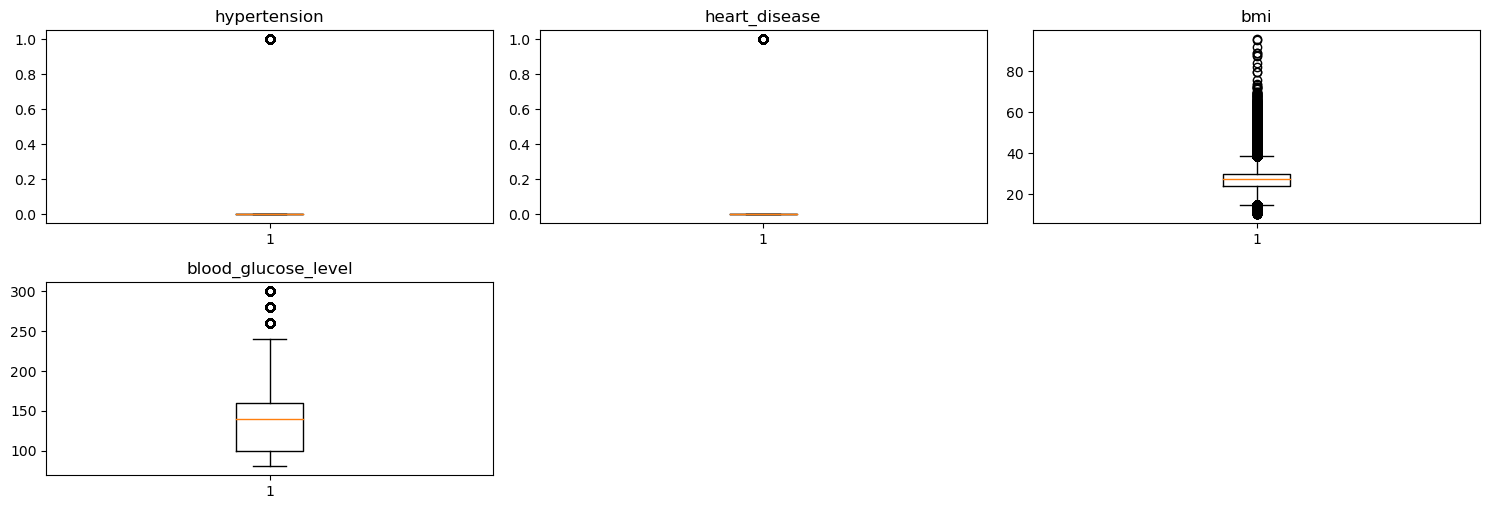

In [9]:
# visualisasi 1: melihat distribusi dari feature yang skew
kolom_outlier = ['hypertension', 'heart_disease', 'bmi', 'blood_glucose_level']

# Membuat boxplot untuk setiap kolom dengan outlier
plt.figure(figsize=(15, 10))
for i, kolom in enumerate(kolom_outlier):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df_ori[kolom])
    plt.title(kolom)
    plt.tight_layout()

plt.show()

Dari boxplot tersebut terlihat bahwa tidak begitu banyak outlier pada feature hypertension, heart_disease, dan blood_glucose_level. Hanya pada outlier feature BMI memang cukup banyak.

## Visualisasi Distribusi Diabetes (Target)

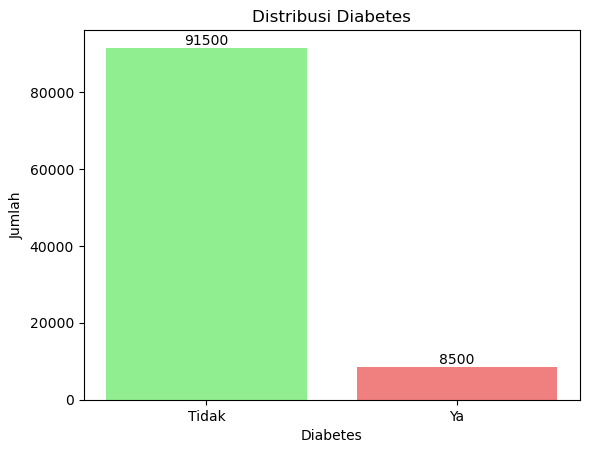

In [10]:
# Visualisasi 2: Distribusi Diabetes

diabetes_counts = df_ori['diabetes'].value_counts()
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['lightgreen', 'lightcoral'])
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.title('Distribusi Diabetes')

# Menambahkan nilai ke setiap bar
for i, value in enumerate(diabetes_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

Bar chart tersebut memperlihatkan bahwa data target memang imbalance yaitu pasien diabetes hanya 10% dari yang tidak diabetes pada dataset ini. Sehingga saya akan menggunakan metrik recall yang memang cocok untuk data imbalance.

## Visualisai Distribusi Usia Penderita Diabetes

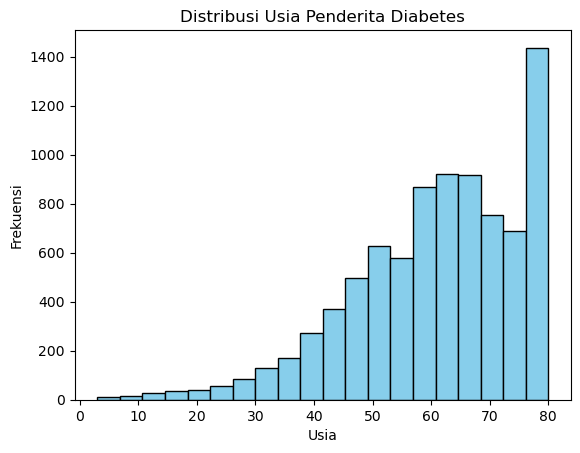

In [11]:
# Visualisasi 3: Distribusi Usia Penderita Diabetes

# Memfilter dataframe hanya untuk penderita diabetes
diabetes_df = df_ori[df_ori['diabetes'] == 1]

plt.hist(diabetes_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Penderita Diabetes')
plt.show()

Visualisasi tersebut menunjukkan bahwa penderita diabetes paling tinggi pada lansia yaitu >= 60 tahun dengan tingkat tertinggi pada rentang 75-80 tahun keatas.

## Hubungan antara Usia dan BMI

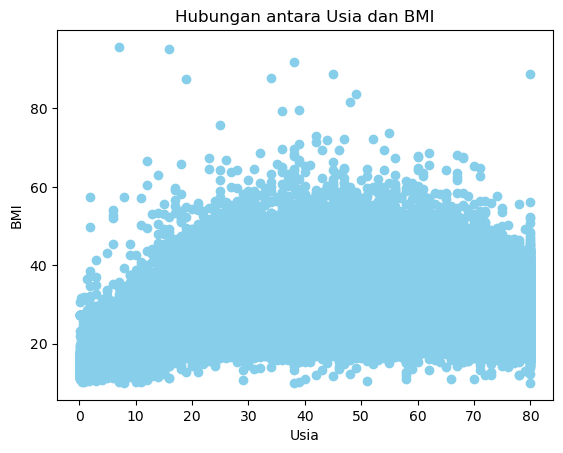

In [12]:
# Visualisasi 4: Hubungan antara Usia dan BMI

plt.scatter(df_ori['age'], df_ori['bmi'], color='skyblue')
plt.xlabel('Usia')
plt.ylabel('BMI')
plt.title('Hubungan antara Usia dan BMI')
plt.show()

Dari scatterplot terlihat bahwa sebagian besar orang memiliki BMI > 25 yang menunjukkan kelebihan berat badan dan masih banyak juga yang memiliki BMI > 30 sehingga termasuk obesitas. Dimana hal tersebut menandakan ukuran lemak tubuh diatas ambang normal dan dapat menyebabkan berbagai penyakit termasuk diabetes.

## Distribusi Hubungan Diabetes dan Hipertensi

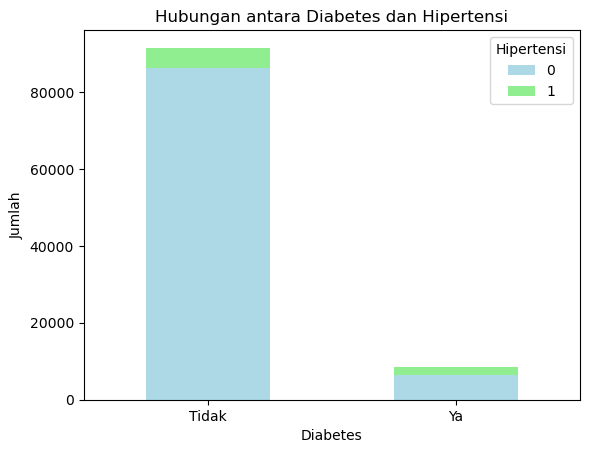

In [13]:
# Visualisai 5: Distribusi Hubungan Diabetes dan Hipertensi

diabetes_hypertension = df_ori.groupby(['diabetes', 'hypertension']).size().unstack()
diabetes_hypertension.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.title('Hubungan antara Diabetes dan Hipertensi')
plt.xticks([0, 1], ['Tidak', 'Ya'], rotation=0)
plt.legend(title='Hipertensi', loc='upper right')
plt.show()

Bar chart tersebut menunjukkan bahwa pada penderita diabetes, lebih dari 50% tidak menderita hipertensi.

## Distribusi BMI pada Penderita Diabetes

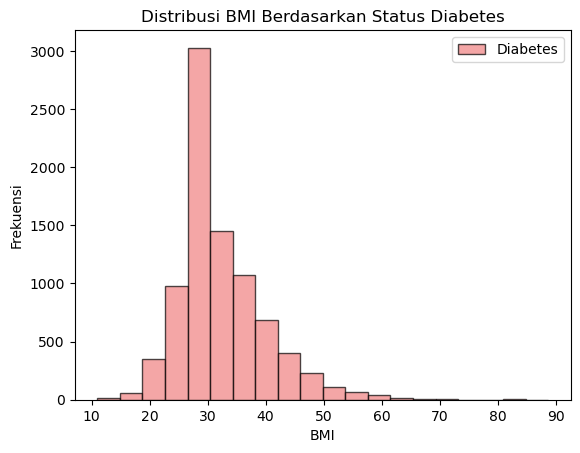

In [14]:
# Visualisai 6: Distribusi BMI Berdasarkan Status Diabetes
bmi_diabetes = df_ori[df_ori['diabetes'] == 1]['bmi']
plt.hist(bmi_diabetes, bins=20, color='lightcoral', edgecolor='black', alpha=0.7, label='Diabetes')

plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.title('Distribusi BMI Berdasarkan Status Diabetes')
plt.legend()
plt.show()

Berdasarkan histogram tersebut, frekuensi BMI tertinggi pada penderita diabetes yaitu sekitar 27-30. Dimana pada rentang BMI tersebut sudah masuk dalam kategori overweight menuju obesitas.

## Distribusi Tingkat Glukosa Darah Penderita Diabetes

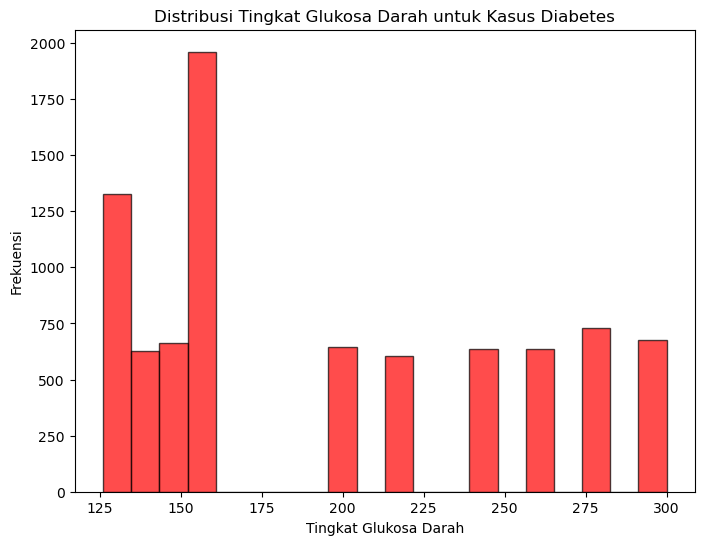

In [15]:
# Visualisasi 7: Distribusi Tingkat Glukosa Darah untuk Kasus Diabetes
# Memfilter data untuk kasus diabetes
diabetes_data = df_ori[df_ori['diabetes'] == 1]

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(diabetes_data['blood_glucose_level'], bins=20, color='red', edgecolor='black', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Tingkat Glukosa Darah')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tingkat Glukosa Darah untuk Kasus Diabetes')

# Menampilkan plot
plt.show()

Pada visualisasi tersebut, dapat dilihat bahwa frekuensi tertinggi tingkat glukosa darah pada penderita diabetes berada di sekitar rentang 150-160 dan tidak menunjukkan pola meningkat.

## Distribusi Penderita Diabetes Berdasarkan Gender

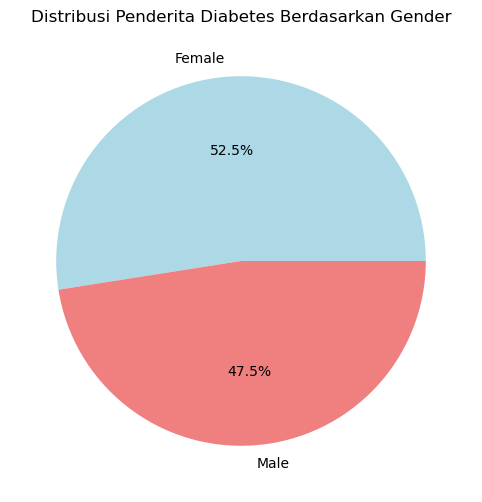

In [16]:
# Visualisasi 8: Distribusi Penderita Diabetes Berdasarkan Gender
# Menghitung jumlah penderita diabetes berdasarkan gender
diabetes_gender_counts = df_ori[df_ori['diabetes'] == 1]['gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_gender_counts, labels=diabetes_gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Menambahkan label dan judul
plt.title('Distribusi Penderita Diabetes Berdasarkan Gender')

# Menampilkan pie chart
plt.show()

Berdasarkan pie chart tersebut, terlihat bahwa perempuan dengan angka 52,5% lebih banyak menderita diabetes dibandingkan laki-laki yang hanya sekitar 47,5%.

## Hubungan Usia, Gender, dan Riwayat Merokok

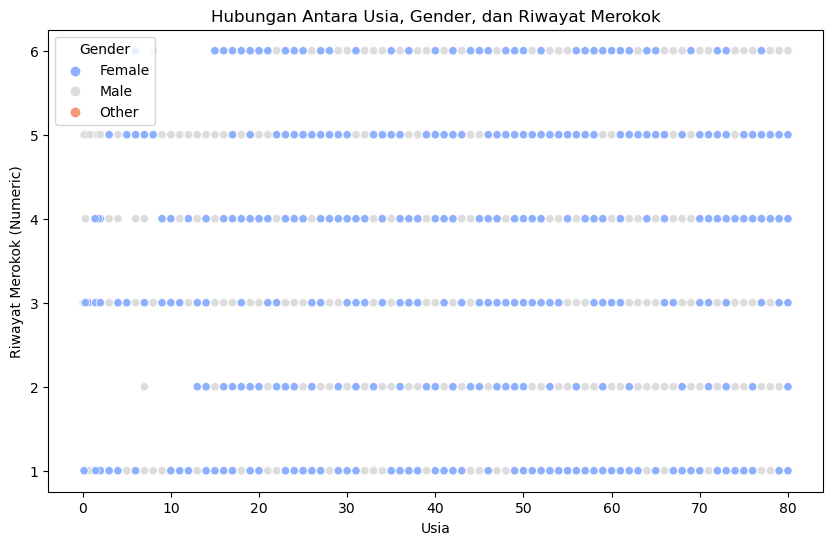

In [17]:
# Visualisasi 9: Hubungan Usia, Gender, dan Riwayat Merokok
# Mapping kategori smoking_history ke nilai numerik
smoking_mapping = {
    'not current': 1,
    'former': 2,
    'No Info': 3,
    'current': 4,
    'never': 5,
    'ever': 6
}

# Mengaplikasikan mapping ke dalam kolom smoking_history
df_ori['smoking_numeric'] = df_ori['smoking_history'].map(smoking_mapping)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ori, x='age', y='smoking_numeric', hue='gender', palette='coolwarm')

# Menambahkan label dan judul
plt.xlabel('Usia')
plt.ylabel('Riwayat Merokok (Numeric)')
plt.title('Hubungan Antara Usia, Gender, dan Riwayat Merokok')

# Menampilkan plot
plt.legend(title='Gender')
plt.show()

Dikarenakan terdapat value "no info" yang merupakan missing value, maka saya melakukan visualisasi ini agar melihat apakah terdapat pola tertentu. Namun, dari visualisasi tersebut terlihat di nomor 3(no info) tidak ada pola tertentu sehingga missing value tersebut merupakan MCAR (Missing Completely at Random).

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [18]:
# membuat random_state agar selalu sama
random_state = 3

## Cek Duplikasi

In [19]:
# cek duplikasi sebelum drop duplikasi
df.duplicated().sum()

3854

In [20]:
# define dataframe untuk menghapus duplikasi
df = df.drop_duplicates()

In [21]:
# cek setelah drop duplikasi
df.duplicated().sum()

0

Terdapat 3854 data duplikat sehingga harus didrop dan dicek kembali.

In [22]:
df.shape

(96146, 9)

Setelah di drop, data yang tadinya berjumlah 100.000 sekarang hanya berjumlah 96146.

## Split Features (X) dan target (y)

In [23]:
# Define features (X) dan target(Y) dimana X adalah features selain diabetes, karena diabetes menjadi target.

X = df.drop('diabetes', axis = 1)
y = df['diabetes']
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


Features (X) terdiri dari 8 kolom.

In [24]:
# melihat shape dari features
X.shape

(96146, 8)

## Split Train and Test set

In [25]:
# split data train dan data test dengan 80% train set dan 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (76916, 8)
Test Size : (19230, 8)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
74230,Female,51.0,0,0,current,21.88,6.5,158
43583,Male,36.0,0,0,No Info,27.32,3.5,80
60180,Female,58.0,0,0,ever,38.55,3.5,100
17007,Male,37.0,0,0,current,30.65,6.1,85
51152,Male,43.0,0,0,No Info,27.32,4.8,126
...,...,...,...,...,...,...,...,...
49050,Female,78.0,0,1,No Info,16.34,5.0,90
60516,Male,45.0,0,0,current,26.48,6.5,126
79596,Female,51.0,0,0,not current,39.48,4.8,80
69189,Female,61.0,0,0,No Info,33.21,6.2,130


Dengan pembagian 80% untuk train didapatkan data sebanyak 76916 baris dan 20% untuk test didapatkan data sebanyak 19230 baris.

## Handling Missing Value

In [26]:
# melihat missing value X_train
X_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [27]:
# melihat missing value X_test
X_test.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [28]:
# melihat missing value y_train
y_train.isnull().sum()

0

In [29]:
# melihat missing value y_test
y_test.isnull().sum()

0

Tidak terdapat missing value. Namun, akan dicek setiap unique value agar dapat dipertimbangkan.

In [30]:
# print melihat value
print("Jenis value dalam feature gender terdiri dari: ", df['gender'].value_counts())
print("="*50)
print("Jenis value dalam feature riwayat merokok terdiri dari: ", df['smoking_history'].value_counts())

Jenis value dalam feature gender terdiri dari:  gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
Jenis value dalam feature riwayat merokok terdiri dari:  smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


Namun, karena terdapat value "Other" pada feature gender dan value "No Info" dalam feature riwayat merokok. Maka perlu dihandling. Menurut saya, jenis missing value kedua nilai tersebut adalah MCAR, karena kedua value tersebut bersifat acak dan tidak terkait dengan nilai-nilai dari variabel lain dalam dataset. Sehingga untuk handlingnya, saya akan melakukan imputasi modus karena kedua feature bersifat kategorikal.

In [31]:
# Hitung modus untuk kolom 'gender'
gender_mode = X_train['gender'].mode()[0]

# Hitung modus untuk kolom 'smoking_history'
smoking_mode = X_train['smoking_history'].mode()[0]

# Mengganti nilai 'other' dengan modus pada kolom 'gender' di X_train dan X_test
X_train['gender'] = X_train['gender'].replace('Other', gender_mode)
X_test['gender'] = X_test['gender'].replace('Other', gender_mode)

# Mengganti nilai 'no info' dengan modus pada kolom 'smoking_history' di X_train dan X_test
X_train['smoking_history'] = X_train['smoking_history'].replace('No Info', smoking_mode)
X_test['smoking_history'] = X_test['smoking_history'].replace('No Info', smoking_mode)

In [32]:
# print untuk cek value setelah dihandling
print("Pada X-Train")
print("Jenis value dalam feature gender terdiri dari: ", X_train['gender'].value_counts())
print("="*50)
print("Jenis value dalam feature riwayat merokok terdiri dari: ", X_train['smoking_history'].value_counts())
print("="*50)
print("Pada X-Test")
print("Jenis value dalam feature gender terdiri dari: ", X_train['gender'].value_counts())
print("="*50)
print("Jenis value dalam feature riwayat merokok terdiri dari: ", X_train['smoking_history'].value_counts())

Pada X-Train
Jenis value dalam feature gender terdiri dari:  gender
Female    44826
Male      32090
Name: count, dtype: int64
Jenis value dalam feature riwayat merokok terdiri dari:  smoking_history
never          53791
former          7480
current         7370
not current     5106
ever            3169
Name: count, dtype: int64
Pada X-Test
Jenis value dalam feature gender terdiri dari:  gender
Female    44826
Male      32090
Name: count, dtype: int64
Jenis value dalam feature riwayat merokok terdiri dari:  smoking_history
never          53791
former          7480
current         7370
not current     5106
ever            3169
Name: count, dtype: int64


Dapat terlihat bahwa value 'other' dan 'no info' telah diatasi dengan nilai modus sehingga nilai tersebut sudah tidak ada.

In [33]:
# cek shape setelah handling missing value
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (76916, 8)
X Test Size : (19230, 8)
y Train Size : (76916,)
y Test Size : (19230,)


Setelah dicek kembali, shape tetap sesuai antara train dan test karena memang tidak dilakukan trimming.

## Handling Outlier

In [34]:
# Memilih hanya kolom-kolom numerik berdasarkan tipe
numeric_data = X_train.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

age                   -0.064880
hypertension           3.135031
heart_disease          4.632636
bmi                    1.027043
HbA1c_level           -0.048277
blood_glucose_level    0.842009
dtype: float64

Dari hasil tersebut, kolom yang memiliki skew ekstrem (>1 atau <-1) adalah:
- hypertension (kategorikal)
- heart_disease (kategorikal)
- bmi

Kolom yang memiliki skew biasa (0.5 s/d 1 atau -0.5 s/d -1) adalah:
- blood_glucose_level

Namun, saya tidak akan melakukan handling outlier pada feature kategorikal tersebut karena nilai outlier bersifat alami bukan karena kesalahan

In [35]:
# KOLOM SKEW EKSTREM
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['bmi']
for col in columns_to_cap_with_median:
    X_train[col] = replace_outliers_with_median(X_train[col])

# Tampilkan DataFrame X_train setelah penggantian outlier 
print(X_train)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
74230  Female  51.0             0              0         current  21.88   
43583    Male  36.0             0              0           never  27.32   
60180  Female  58.0             0              0            ever  38.55   
17007    Male  37.0             0              0         current  30.65   
51152    Male  43.0             0              0           never  27.32   
...       ...   ...           ...            ...             ...    ...   
49050  Female  78.0             0              1           never  16.34   
60516    Male  45.0             0              0         current  26.48   
79596  Female  51.0             0              0     not current  39.48   
69189  Female  61.0             0              0           never  33.21   
73730  Female  35.0             0              0           never  27.32   

       HbA1c_level  blood_glucose_level  
74230          6.5                  158  
43583          

In [36]:
# KOLOM SKEW BIASA
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['blood_glucose_level']
for col in columns_to_cap_with_median:
    X_train[col] = replace_outliers_with_median(X_train[col])

# Tampilkan DataFrame X_train setelah penggantian outlier 
print(X_train)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
74230  Female  51.0             0              0         current  21.88   
43583    Male  36.0             0              0           never  27.32   
60180  Female  58.0             0              0            ever  38.55   
17007    Male  37.0             0              0         current  30.65   
51152    Male  43.0             0              0           never  27.32   
...       ...   ...           ...            ...             ...    ...   
49050  Female  78.0             0              1           never  16.34   
60516    Male  45.0             0              0         current  26.48   
79596  Female  51.0             0              0     not current  39.48   
69189  Female  61.0             0              0           never  33.21   
73730  Female  35.0             0              0           never  27.32   

       HbA1c_level  blood_glucose_level  
74230          6.5                158.0  
43583          

In [37]:
# Memilih hanya kolom-kolom numerik
numeric_data = X_train.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

age                   -0.064880
hypertension           3.135031
heart_disease          4.632636
bmi                    0.510208
HbA1c_level           -0.048277
blood_glucose_level    0.122095
dtype: float64

Ternyata setelah dihandle outlier, nilai skew pada kolom-kolom numerik yang sudah dihandling tersebut berubah mendekati normal dan bahkan sudah ada kolom yang berdistribusi normal. 

In [38]:
# melihat shape setelah handling outlier

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (76916, 8)
X Test Size : (19230, 8)
y Train Size : (76916,)
y Test Size : (19230,)


Shape x_train dan y_train setelah handling outlier adalah tetap sama.

## Feature Selection

Uji korelasi menggunakan phik karena terdapat kolom numerik dan kategorik.

In [39]:
# Menggabungkan X_train dengan y_train untuk menghitung korelasi
train_set_fs = pd.concat([X_train, y_train], axis=1)

# Menyatakan tipe data sebelum menjalankan phik correlation
train_types_fs = {
    "gender": "categorical",
    "age": "interval",
    "hypertension": "categorical",
    "heart_disease": "categorical",
    "smoking_history": "ordinal",
    "bmi": "interval",
    "HbA1c_level": "interval",
    "blood_glucose_level": "interval",
}

# Memilih kolom interval yang akan digunakan untuk menghitung korelasi phi-k
interval_cols = [col for col, v in train_types_fs.items() if v == 'interval']

# Menghitung korelasi phi-k
phik_corr = train_set_fs.phik_matrix(interval_cols=interval_cols)['diabetes']
print(phik_corr)

gender                 0.059647
age                    0.366096
hypertension           0.307855
heart_disease          0.261163
smoking_history        0.087844
bmi                    0.267021
HbA1c_level            0.666820
blood_glucose_level    0.435912
diabetes               1.000000
Name: diabetes, dtype: float64


Meskipun terdapat beberapa feature yang nilai kroelasi phik < 0,1 yaitu gender dan smoking_history. Namun, saya akan tetap memasukkan feature gender dan smoking_history dengan alasan:
- Diabetes, khususnya tipe 2, lebih banyak terjadi pada pria daripada wanita. Namun, wanita sering memiliki komplikasi lebih parah dan risiko lebih tinggi dari kematian (https://www.news-medical.net/health/Diabetes-in-Men-versus-Women.aspx)
- Kebiasaan merokok dapat mempengaruhi risiko terkena diabetes, karena rokok memiliki lebih dari 7.000 bahan kimia, salah satunya nikotin yang bersifat sangat adiktif (https://health.kompas.com/read/23E31100000868/kebiasaan-merokok-dan-diabetes-yang-bahaya-untuk-kesehatan?page=all)

Sehingga saya akan tetap memasukkan seluruh feature

In [40]:
# cek shape setelah feature selection
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (76916, 8)
X Test Size : (19230, 8)
y Train Size : (76916,)
y Test Size : (19230,)


Setelah feature selection, jumlah feature tetap 8 karena tidak ada yang didrop.

## Cardinality Check

In [41]:
# Cek unique value pada kolom kategorik 
print("Unique Value pada kolom gender adalah:", X_train['gender'].unique())
print("Unique Value pada kolom hypertension adalah:", X_train['hypertension'].unique())
print("Unique Value pada kolom heart_disease adalah:", X_train['heart_disease'].unique())
print("Unique Value pada kolom smoking_history adalah:", X_train['smoking_history'].unique())

Unique Value pada kolom gender adalah: ['Female' 'Male']
Unique Value pada kolom hypertension adalah: [0 1]
Unique Value pada kolom heart_disease adalah: [0 1]
Unique Value pada kolom smoking_history adalah: ['current' 'never' 'ever' 'former' 'not current']


Pada unique value berupa angka tidak akan dilakukan encoder. Pada feature gender dan smoking_history karena masih berupa string, maka akan dilakukan encoder. Saya juga akan menjelaskan bahwa setiap value di smoking_history memiliki perbedaan masing-masing sehingga tidak saya kurangi cardinalitynya.
Berikut tingkatan smoking_history terhadap terjadinya penyakit diabetes:
- 'former' (Mantan Perokok): Meskipun mereka telah berhenti merokok, mantan perokok mungkin masih memiliki risiko lebih tinggi untuk mengalami diabetes karena dampak merokok sebelumnya terhadap kesehatan mereka.
- 'never' (Tidak Pernah Merokok): Orang yang tidak pernah merokok cenderung memiliki risiko lebih rendah untuk mengalami diabetes karena mereka tidak terpapar zat-zat berbahaya dalam rokok.
- 'current' (Merokok Saat Ini): Orang yang sedang merokok cenderung memiliki risiko lebih tinggi untuk mengalami diabetes karena efek buruk dari merokok terhadap kesehatan.
- 'ever' (Pernah Merokok): Orang yang pernah merokok, terlepas dari apakah mereka masih merokok atau tidak, masih memiliki risiko yang cukup tinggi untuk mengalami diabetes.
- 'not current' (Tidak Merokok Saat Ini): Orang yang tidak merokok pada saat ini, termasuk mantan perokok dan yang tidak pernah merokok, mungkin memiliki risiko yang lebih rendah untuk mengalami diabetes, terutama jika mereka telah berhenti merokok dan menerapkan gaya hidup yang sehat. 

## Split numerical columns and categorical columns

Saya melakukan 3 split karena pada feature kategorik akan dibedakan encodingnya.

In [42]:
# define numerik dan kategorik features dari dataframe x_train yang sudah dihandle outlier berdasarkan tipe kolom
# define numerik di x_train
num_col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# define kategorikal nominal
cat_col_n = ['gender']

# define kategorikal ordinal
cat_col_o = ['smoking_history']

# print
print(f'numerical columns= {num_col}')
print(f'categorical columns= {cat_col_n}')
print(f'ordinal columns= {cat_col_o}')

numerical columns= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical columns= ['gender']
ordinal columns= ['smoking_history']


Saya menggunakan standard scaler karena feature numerik telah dihandling outliernya.

In [43]:
# Inisialisasi StandardScaler 
scaler = StandardScaler()

# Inisialisasi OrdinalEncoder untuk kategori ordinal
ordinal_encoder = OrdinalEncoder()

# Inisialisasi OneHotEncoder untuk kategori nominal
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Menggabungkan scaler dan encoder dalam ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Melakukan scaling pada kolom numerik
        ('ord', ordinal_encoder, cat_col_o),  # Melakukan encoding ordinal pada kolom ordinal
        ('nom', onehot_encoder, cat_col_n),  # Melakukan one-hot encoding pada kolom nominal
    ],
    remainder='passthrough'  # Biarkan fitur-fitur lainnya tanpa perubahan
)

Pipeline Preprocess siap dimasukkan dalam model.

# vi. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Saya akan memilih boosting GradientBoostingClassifier karena:
1. Kemampuan untuk menangani data yang kompleks: Gradient Boosting adalah salah satu metode ensemble yang kuat yang mampu menangani data yang kompleks dan fitur yang tidak linier dengan baik.
2. Kinerja yang baik dalam berbagai jenis data: Gradient Boosting sering kali memberikan kinerja yang baik pada berbagai jenis dataset, termasuk dataset dengan fitur kategorikal, numerik, atau campuran dari keduanya.
3. Kemampuan dalam menangani overfitting: Gradient Boosting cenderung memiliki kemampuan yang baik untuk mengatasi masalah overfitting, terutama ketika parameter model disetel dengan benar.

In [44]:
# Mendefinisikan model SVM, KNN, Decision Tree, Random Forest, dan Boosting dengan make_pipeline
pipe_svm = make_pipeline(preprocess, SVC(random_state=random_state))
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=random_state))
pipe_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=random_state))
pipe_gb = make_pipeline(preprocess, GradientBoostingClassifier(random_state=random_state))

In [45]:
# Mendefinisikan skfold untuk diinput dalam cross validation setiap model
skfold = StratifiedKFold(n_splits=5)

In [46]:
# Melakukan cross validation untuk masing-masing model dengan metrik recall
cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv=skfold, scoring='recall', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring='recall', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv=skfold, scoring='recall', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv=skfold, scoring='recall', n_jobs=-1)
cv_gb_model = cross_val_score(pipe_gb, X_train, y_train, cv=skfold, scoring='recall', n_jobs=-1)

In [47]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores = 0
for cv, name in zip([cv_svm_model, cv_knn_model, cv_dt_model, cv_rf_model, cv_gb_model],
                    ['svm_model', 'knn_model', 'dt_model', 'rf_model', 'gb_model']):
    print(name)
    print('Recall Score - All - Cross Validation:', cv)
    print('Recall Score - Mean - Cross Validation:', cv.mean())
    print('Recall Score - Std - Cross Validation:', cv.std())
    print('Recall Score - Range of Test Set:', (cv.mean() - cv.std()), '-', (cv.mean() + cv.std()))
    print('-' * 50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

svm_model
Recall Score - All - Cross Validation: [0.48867787 0.44152047 0.46311176 0.45361578 0.42658875]
Recall Score - Mean - Cross Validation: 0.45470292483094765
Recall Score - Std - Cross Validation: 0.020930222410932592
Recall Score - Range of Test Set: 0.4337727024200151 - 0.4756331472418802
--------------------------------------------------
knn_model
Recall Score - All - Cross Validation: [0.56172389 0.54897661 0.55807159 0.55807159 0.53177502]
Recall Score - Mean - Cross Validation: 0.5517237365388148
Recall Score - Std - Cross Validation: 0.010826739379652537
Recall Score - Range of Test Set: 0.5408969971591623 - 0.5625504759184673
--------------------------------------------------
dt_model
Recall Score - All - Cross Validation: [0.70051132 0.67251462 0.69028488 0.66325785 0.65230095]
Recall Score - Mean - Cross Validation: 0.6757739247070684
Recall Score - Std - Cross Validation: 0.01755427203201048
Recall Score - Range of Test Set: 0.658219652675058 - 0.6933281967390789
---

Setelah dilakukan cross validation pada kelima model, model terbaik berdasarkan mean cross validation adalah dt_model yang selanjutnya akan ditrain dan dievaluasi menggunakan metrik klasifikasi Recall.

# vii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [48]:
# Training best model (DT)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['smoking_history']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=3))])

Training best model (dt) pada data train sebelum dilakukan model evaluasi.

# viii. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Predict Train dan Test Sebelum Tuning

Recall Score - Train Set  :  0.9830508474576272 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70072
           1       1.00      0.98      0.99      6844

    accuracy                           1.00     76916
   macro avg       1.00      0.99      1.00     76916
weighted avg       1.00      1.00      1.00     76916
 

Confusion Matrix      : 


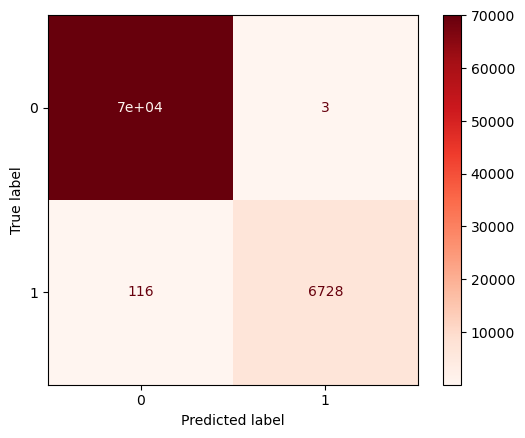

In [49]:
# Check Performance Model against Train-Set
y_pred_train = pipe_dt.predict(X_train)

print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_dt, X_train, y_train, cmap='Reds'))

Recall score pada train set sebelum tuning menunjukkan angka 0.98 dan angka FN yang didapatkan sebesar 116.
Dengan mendapatkan recall score sebesar 0.98 pada train set dengan hyperparameter default dan jumlah False Negatives sebanyak 116, ini menunjukkan bahwa model Decision Tree cukup baik dalam mengidentifikasi sebagian besar kasus positif (diabetes) yang sebenarnya (True Positives) dari total kasus positif yang ada di dalam dataset.

Recall Score - Test Set   :  0.7564102564102564 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     17592
           1       0.67      0.76      0.71      1638

    accuracy                           0.95     19230
   macro avg       0.83      0.86      0.84     19230
weighted avg       0.95      0.95      0.95     19230
 

Confusion Matrix      : 


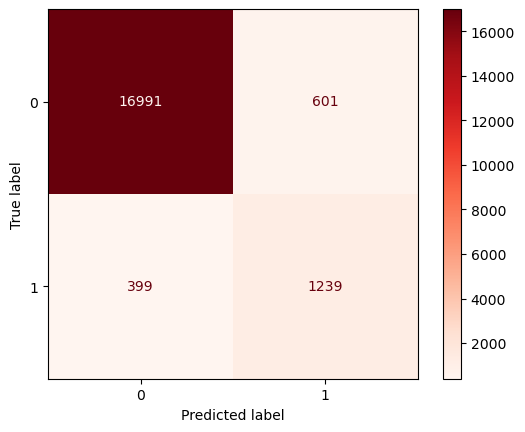

In [50]:
# Check Test-Set
y_pred_test = pipe_dt.predict(X_test)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_dt, X_test, y_test, cmap='Reds'))

Namun, saat predict di train-set skor recall hanya 0.76 dengan FN 399. 
FN 399 mengacu pada jumlah prediksi model yang salah ketika model memprediksi bahwa pasien tidak memiliki diabetes (kelas negatif), padahal sebenarnya mereka memiliki diabetes (kelas positif). FN mengindikasikan kasus di mana model tidak mengidentifikasi dengan benar pasien yang seharusnya dinyatakan positif terhadap diabetes, yang dapat berdampak buruk pada pasien yang tidak mendapatkan diagnosis atau perawatan yang tepat. Sehingga dapat dikatakan model masih overfitting dan perlu dilakukan hyperparameter tuning untuk meningkatkan performa.

In [51]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - recall_score' : recall_score(y_train, y_pred_train),
      'test - recall_score' : recall_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - recall_score,0.756410
train - recall_score,0.983051


Berikut adalah proses model evaluasi dengan menggunakan metrik klasifikasi Recall. Model dt yang dilakukan menggunakan default hyperparameter yang hanya menghasilkan Recall Score pada train sebesar 0.98 dan Recall score pada test sebesar 0.75. Model ini masih terbilang overfit karena score yang dihasilkan pada train tinggi, namun pada test cukup rendah. Sehingga perlu dilakukan hyperparameter tuning.

## Hyperparameter Tuning Best Model
> Menggunakan Random Search agar lebih mudah dan cepat

In [52]:
# Parameter untuk pencarian acak
param_distributions = {
    'decisiontreeclassifier__max_depth': [None] + list(range(10, 51, 10)),  # Nilai untuk kedalaman maksimum
    'decisiontreeclassifier__min_samples_split': randint(2, 11),  # Nilai untuk minimum sampel split
    'decisiontreeclassifier__min_samples_leaf': randint(1, 5)  # Nilai untuk minimum sampel leaf
}

# Inisialisasi RandomizedSearchCV
dt_random_search = RandomizedSearchCV(pipe_dt, param_distributions, cv=5, random_state=random_state)

# Fitting model
dt_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'bmi',
                                                                                'HbA1c_level',
                                                                                'blood_glucose_level']),
                                                                              ('ord',
                                                                               OrdinalEncoder(),
                                                                               ['smoking_history']),
                                                                              ('nom',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['gender'])])),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClas...3))]),
                   param_distributions={'decisiontreeclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30,
                                                                              40,
                                                                              50],
                                        'decisiontreeclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D2C0DC8DD0>,
                                        'decisiontreeclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D2C0E0BE50>},
                   random_state=3)

In [53]:
# Output parameter terbaik
print("Best parameters:", dt_random_search.best_params_)

Best parameters: {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 7}


Setelah dilakukan random search dan ditrain kembali pada data train, best hyperparameter yang dihasilkan adalah:
- max_depth = 20
- min_samples_leaf = 4
- min_samples_split = 7

sehingga akan dilakukan evaluasi menggunakan paramater terbaik dan dibandingkan dengan hasil pada model default.

In [54]:
# Get Best Estimator
dt_random_search_best = dt_random_search.best_estimator_

In [55]:
# print hasil dari pencarian hyperparameter tuning yang dilakukan dengan algoritma DT menggunakan metode Randomized Search.
print('Best cross-validation accuracy : {:.2f}'.format(dt_random_search.best_score_))
print('Best parameters : ', dt_random_search.best_params_)
print('Test set accuracy : {:.2f}'.format(dt_random_search.score(X_test, y_test)))

Best cross-validation accuracy : 0.95
Best parameters :  {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 7}
Test set accuracy : 0.96


Recall Score - Train Set  :  0.7641729982466394 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     70072
           1       0.93      0.76      0.84      6844

    accuracy                           0.97     76916
   macro avg       0.95      0.88      0.91     76916
weighted avg       0.97      0.97      0.97     76916
 

Confusion Matrix      : 


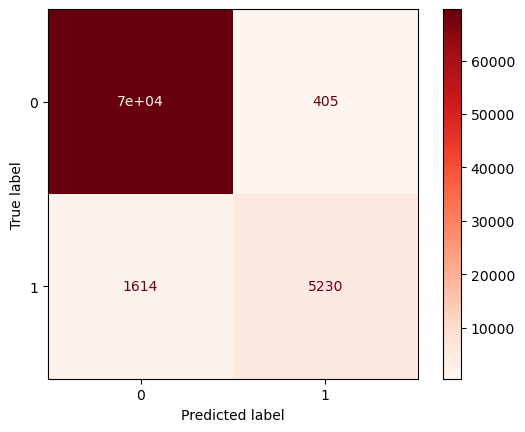

In [56]:
# Check Performance Model against Train-Set setelah tuning

y_pred_train = dt_random_search_best.predict(X_train)

print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_random_search_best, X_train, y_train, cmap='Reds'))

Pada hasil train set menggunakan model DT setelah tuning menghasilkan Recall score sebesar 0.76 yang menunjukkan bahwa model mampu mengidentifikasi sekitar 75% dari semua kasus positif (diabetes) yang sebenarnya ada dalam dataset. Apabila dibandingkan dengan hasil train set pada model DT sebelum tuning, score ini mengalami penurunan. Namun, akan dilihat test-setnya apakah goodfit atau tidak. Kemudian, pada hasil ini juga menghasilkan jumlah False Negative (FN) sebanyak 1614 menunjukkan bahwa model gagal mengidentifikasi 1614 kasus diabetes sebagai non-diabetes.

Recall Score - Test Set   :  0.724053724053724 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17592
           1       0.78      0.72      0.75      1638

    accuracy                           0.96     19230
   macro avg       0.88      0.85      0.87     19230
weighted avg       0.96      0.96      0.96     19230
 

Confusion Matrix      : 


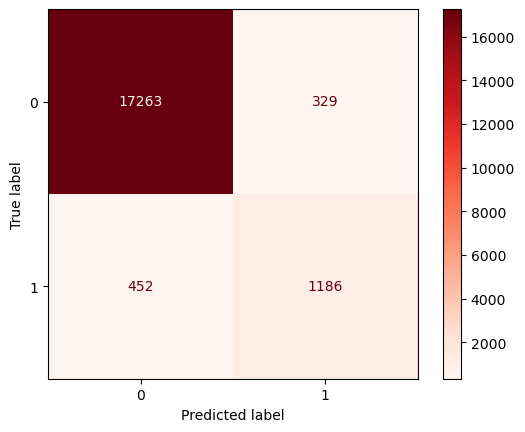

In [57]:
# Check Test-Set setelah tuning

y_pred_test = dt_random_search_best.predict(X_test)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_random_search_best, X_test, y_test, cmap='Reds'))

Pada hasil test set menggunakan model DT setelah tuning menghasilkan Recall score sebesar 0.72 menunjukkan bahwa model mampu mengidentifikasi sekitar 72% dari semua kasus positif (diabetes) yang sebenarnya ada dalam dataset test. Jika dibandingkan dengan hasil test set pada model DT sebelum tuning tentunya lebih rendah, namun tidak jauh berbeda dengan recall score di train-set. Kemudian, pada hasil test-set ini jumlah False Negative (FN) sebanyak 452 yang menunjukkan bahwa model gagal mengidentifikasi 452 kasus diabetes sebagai non-diabetes pada dataset uji.

In [58]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - recall_score,0.983051,0.764173
test - recall_score,0.756410,0.724054


Dari hasil perbandingan antara model Decision Tree dengan default hyperparameter dan hasil setelah tuning menggunakan metode Random Search, diperoleh:
1. Baseline (Default Hyperparameter):
    - Skor recall pada data train sebesar 0.98 menunjukkan kemampuan model untuk mengidentifikasi sebagian besar kasus positif (diabetes) dengan sangat baik.
    - Namun, pada data test, skor recall turun menjadi 0.76, menunjukkan adanya overfitting yang signifikan. Model cenderung tidak mampu melakukan generalisasi dengan baik pada data baru.

2. Random Search (setelah tuning):
    - Setelah tuning menggunakan metode Random Search, skor recall pada data train turun menjadi 0.76.
    - Skor recall pada data test juga menurun menjadi 0.72.
    - Meskipun terjadi penurunan performa pada kedua set data, model setelah tuning cenderung memiliki kemampuan generalisasi yang lebih baik daripada model dengan default hyperparameter.

Berdasarkan hasil tersebut, saya akan memilih model setelah tuning dengan metode Random Search karena memiliki kemungkinan untuk lebih baik dalam melakukan generalisasi pada data baru. Meskipun demikian, perlu dilakukan further improvement untuk meningkatkan performa model.

# ix. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

Saya akan save model DT setelah melakukan tuning dengan random search.

In [59]:
# Save file model SVM default as best model
with open('model_DT.pkl', 'wb') as file_1: 
  pickle.dump(dt_random_search_best, file_1)

# xi. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil Model Evaluation. Notebook Model Inference haruslah berbeda dengan notebook saat pembuatan model dilakukan.

Terdapat dalam notebook "P1M2_nailina_farah_inf.ipynb"

# xii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan Hasil

**Kesimpulan Secara Keseluruhan:**
Proyek ini bertujuan untuk memprediksi kemungkinan terjadinya diabetes pada seseorang berdasarkan beberapa faktor riwayat medis dan demografi menggunakan data yang tersedia. Metrik evaluasi yang digunakan adalah Recall karena fokus pada mengurangi False Negatives yang dapat menyebabkan pengobatan yang terlambat atau tidak sesuai. Berikut beberapa poin highlight:
- Data awal berjumlah 100.000 baris dengan 9 fitur, termasuk 3 kolom float, 4 kolom integer, dan 2 kolom objek.
- Setelah penanganan data duplikat, data berkurang menjadi 96.146 baris.
- Model Decision Tree (DT) dipilih dan dituning menggunakan Random Search untuk meningkatkan performa.
- Setelah tuning, DT menghasilkan Recall score 0.76 pada train set dengan 1614 False Negatives, dan 0.72 pada test set dengan 452 False Negatives.
- Hasil perbandingan antara model DT dengan default hyperparameter dan hasil setelah tuning menunjukkan peningkatan performa setelah tuning, meskipun masih kurang baik performanya.

Kesimpulannya, meskipun terdapat tantangan seperti overfitting dan penurunan performa setelah tuning, model Decision Tree setelah tuning dengan Random Search menunjukkan potensi yang lebih baik dalam memprediksi diabetes. Langkah selanjutnya adalah melakukan further improvement untuk meningkatkan performa model sebelum diimplementasikan secara luas dalam praktik klinis.


**Kesimpulan Model DT:**

**Kelebihan DT:**
1. **Simple to understand and to interpret:** Kemudahan dalam memahami dan menginterpretasi model Decision Tree membuat model ini mudah dimengerti dan dapat divisualisasikan, sehingga memungkinkan interpretasi yang jelas terhadap faktor-faktor yang mempengaruhi prediksi diabetes.

2. **Non-parametric method:** Karena Decision Tree adalah metode non-parametrik, sehingga memudahkan membuat model tanpa mempertimbangkan asumsi-asumsi.

3. **Handling high dimensional data:** Kemampuan Decision Tree dalam menangani data dengan dimensi tinggi, meskipun data saya tidak berdimensi tinggi namun ini bagus untuk menangani kompleksitas data prediksi diabetes yang terdiri dari beberapa fitur.

4. **Less effort for training:** Decision Tree membutuhkan usaha yang relatif lebih sedikit dalam proses training, yang sesuai dengan keunggulan algoritma ini dalam menghemat waktu dan sumber daya.

5. **Classify non-linearly separable data:** Kemampuan Decision Tree untuk mengklasifikasikan data yang tidak linear sesuai dengan kasus ini bahwa model ini cocok untuk mengklasifikasikan hubungan antara variabel prediktor dan variabel target dalam prediksi diabetes.

**Keterbatasan DT:**
1. **Prone to overfitting:** Pada kasus kali ini menunjukkan bahwa model Decision Tree cenderung mengalami overfitting, yang sejalan dengan kelemahan algoritma ini terhadap kemungkinan mempelajari pola yang spesifik pada data training dan gagal dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Namun, dapat diatasi dengan hyperparameter tuning

2. **Bias towards dominant classes:** Hasil kasus ini yang menunjukkan bias terhadap kelas dominan dalam dataset tidak seimbang menggambarkan kelemahan Decision Tree dalam menangani situasi di mana kelas target tidak seimbang, seperti pada prediksi diabetes.

3. **Sensitive to small data changes:** Kepekaan Decision Tree terhadap perubahan kecil dalam data ini dapat bereaksi terhadap perubahan kecil dalam dataset, yang dapat memengaruhi struktur pohon dan kinerja keseluruhan model.


**Further Improvement:**
1. **Menggunakan SMOTE:** Karena pada dataset ini memiliki jumlah yang imbalance, maka sebaiknya dilakukan data balancing terlebih dahulu agar model yang dibuat semakin baik performanya.
2. **Hanya memilih feature yang berkorelasi:** Pada kasus ini saya menggunakan seluruh feature karena berdasarkan referensi feeature tersebut adalah feature yang penting memengaruhi diabates. Namun, dapat juga didrop agar model lebih baik karena pada dataset ini, terdapat beberapa feature yang nilai korelasinya rendah dengan terget (diabetes).
3. **Menggunakan teknik boosting lain:** Pada kasus ini, saya hanya menggunakan Gradient Boosting karena menurut saya itu cocok untuk dataset ini dengan beberapa alasan diantaranya mampu menangani overfitting. Namun, lebih baik dicoba juga untuk AdaBoost dan XGBoost yang mungkin dapat menjadi model terbaik agar dapat meningkatkan performa dan kestabilan prediksi.
4. **Hyperparameter Tuning yang Lebih Lanjut:** Melakukan tuning hyperparameter dengan rentang yang lebih luas dan menggunakan metode optimasi yang lebih canggih seperti Grid Search atau Bayesian Optimization untuk mencari kombinasi hyperparameter yang optimal.
5. **Cross-Validation yang Lebih Komprehensif:** Menggunakan teknik cross-validation yang lebih kompleks seperti nested cross-validation untuk mengevaluasi model secara lebih akurat dan menghindari overfitting.

Dengan melakukan improvement pada beberapa aspek di atas, diharapkan model dapat menghasilkan prediksi yang lebih akurat dan dapat diandalkan untuk membantu dalam deteksi dini dan manajemen penyakit diabetes.

**Business Insight:**
1. **Pola Penderita Diabetes pada Rentang Usia:** Terlihat dari visualisasi bahwa penderita diabetes paling tinggi berada pada kelompok usia lanjut, khususnya di atas 60 tahun dengan tingkat tertinggi pada rentang usia 75-80 tahun ke atas. Hal ini menunjukkan pentingnya pemeriksaan dan pengelolaan diabetes pada populasi lanjut usia.

2. **Tingkat BMI dan Risiko Diabetes:** Scatterplot menunjukkan bahwa sebagian besar individu memiliki BMI di atas 25, yang mengindikasikan kelebihan berat badan hingga obesitas. Hal ini menandakan bahwa perhatian terhadap kontrol berat badan dan gaya hidup sehat dapat menjadi faktor kunci dalam mencegah diabetes dan penyakit terkait lainnya.

3. **Hubungan antara Diabetes dan Hipertensi:** Meskipun hipertensi sering dikaitkan dengan diabetes, visualisasi menunjukkan bahwa lebih dari 50% pasien diabetes tidak menderita hipertensi. Ini menyoroti kompleksitas hubungan antara faktor risiko kesehatan dan menunjukkan perlunya penelitian lebih lanjut tentang faktor-faktor penyebab diabetes yang mungkin lebih kompleks daripada yang dianggap sebelumnya.

4. **Frekuensi Tingkat Glukosa Darah pada Penderita Diabetes:** Histogram menunjukkan bahwa frekuensi tertinggi tingkat glukosa darah pada penderita diabetes berada di sekitar rentang 150-160, yang menunjukkan kebutuhan untuk memantau dan mengelola kadar glukosa darah pada pasien diabetes untuk mengurangi risiko komplikasi.

5. **Perbedaan Risiko Diabetes antara Gender:** Pie chart menunjukkan bahwa perempuan memiliki risiko lebih tinggi untuk menderita diabetes dibandingkan dengan laki-laki. Hal ini menunjukkan perlunya pendekatan khusus dalam pencegahan dan manajemen diabetes pada populasi perempuan. Namun, juga perlu diperhatikan polanya baik pada laki-laki maupun perempuan.

Dengan mempertimbangkan temuan ini, diharapkan pihak terkait dapat mengambil langkah-langkah proaktif dalam pencegahan, manajemen, dan perawatan diabetes, serta meningkatkan pemahaman tentang faktor-faktor risiko yang berkontribusi terhadap penyakit ini.

## Jawaban Conceptual Problems

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging (Bootstrap Aggregating) adalah sebuah teknik pengelompokan data yang digunakan untuk membangun model pembelajaran mesin yang lebih stabil dan akurat. 

Cara kerja bagging yaitu:
1. Data pembelajaran: Bagging menggunakan data pembelajaran yang diperlukan untuk membangun model pembelajaran. Data ini diperlukan untuk mengikuti langkah-langkah pembelajaran yang akan dilakukan.
2. Bootstrap: Bagging menggunakan bootstrap, yang merupakan teknik pengumpulan data yang mengumpulkan data pembelajaran secara acak dengan menggabungkan duplikasi data. Ini dilakukan sebanyak 100 kali (atau sekali setiap bagging) untuk membangun model pembelajaran.
3. Pembelajaran: Setiap kali pembelajaran, model pembelajaran akan dilakukan dengan data bootstrap yang berbeda. Hal ini akan menghasilkan model pembelajaran yang berbeda, yang akan digunakan untuk membuat model akhir.
4. Aggregating: Setelah model pembelajaran dibangun, bagging akan mengumpulkan hasil model-model tersebut dan mencoba untuk menemukan persamaan yang paling dekat dengan data pembelajaran asli. Ini akan menghasilkan model pembelajaran akhir yang lebih stabil dan akurat.

Bagging  membantu untuk mengurangi efek overfitting dan membangun model yang lebih stabil dan akurat. Contoh bagging adalah random forest. Random forest merupakan decision tree yang dibagging.

Source:
- https://wiragotama.github.io/resources/ebook/intro-to-ml-secured.pdf
- https://ejournal.brin.go.id/JTL/article/download/795/527
- https://repository.its.ac.id/42811/2/3313100009-Undergraduate_Thesis.pdf

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Algoritma boosting yang saya pilih adalah Gradient Boosting.
Random Forest dan Gradient Boosting adalah dua teknik pembelajaran mesin yang berbeda dalam cara kerjanya.

**Random Forest** adalah teknik ensemble yang menggunakan bagging (bootstrap aggregating) dan random feature selection. Cara kerjanya adalah:
1. Memilih beberapa pohon keputusan secara acak dari data pembelajaran.
2. Memilih beberapa variabel secara acak dari setiap pohon keputusan.
3. Menentukan kelas yang paling banyak diperoleh dari semua pohon keputusan.
4. Memperlakukan langkah 1-3 sebanyak kali yang diperlukan.

**Gradient Boosting** adalah teknik ensemble yang menggunakan boosting untuk proses pengoptimalan dengan menggunakan loss function untuk meminimalisir error. Cara kerjanya adalah:
1. Memilih pohon keputusan pertama dari data pembelajaran.
2. Menghitung error pada pohon tersebut.
3. Memilih pohon keputusan kedua yang memiliki error yang paling rendah.
4. Menghitung error pada pohon tersebut.
5. Menghitung error pada semua pohon keputusan.

Perbedaan utama antara Random Forest dan Gradient Boosting adalah cara pembentukan pohonnya. Random Forest menggunakan bagging dan random feature selection, sedangkan Gradient Boosting menggunakan boosting untuk proses pengoptimalan dengan menggunakan loss function untuk meminimalisir error.

Source:
- https://repository.uinjkt.ac.id/dspace/bitstream/123456789/74286/1/ZULFATUL%20AINI-FST.pdf
- https://ejurnal.ung.ac.id/index.php/jjom/article/download/15869/5638
- https://dqlab.id/algoritma-machine-learning-yang-perlu-dipelajari
- http://repository.untag-sby.ac.id/5666/8/JURNAL.pdf
- https://ejournal.brin.go.id/JTL/article/download/795/527

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah teknik untuk mengevaluasi kinerja model pembelajaran mesin dan mengetahui kinerja model dalam menangani data yang belum pernah dipelajari sebelumnya. 

Cara kerja cross-validation adalah:
1. Bagi dataset menjadi beberapa bagian atau "fold".
2. Untuk setiap fold, model dipelajari menggunakan bagian data yang lain, dan kinerja model diuji menggunakan bagian data yang tidak digunakan dalam pelajaran.
3. Repeat 1-2 steps untuk setiap fold.
4. Rata-rata kinerja model dari setiap fold untuk menentukan kinerja total model.

Cross-validation berguna untuk menghindari overfitting. Cross-validation juga berguna untuk mengetahui kinerja model pada data yang belum pernah dipelajari, yang akan menjadi data untuk produksi.
Tidak semua teknik cross-validation sama, ada beberapa teknik yang berbeda, seperti k-fold cross-validation, leave-one-out cross-validation, dan nested cross-validation. Semua teknik cross-validation memiliki ciri utama yang sama, yaitu menggunakan bagian data untuk pelajaran dan bagian data untuk uji, dan menghitung kinerja model dari setiap bagian data.

Source:
- https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75
- http://repository.untag-sby.ac.id/5666/8/JURNAL.pdf
- https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right
- https://wiragotama.github.io/resources/ebook/intro-to-ml-secured.pdf
- https://en.wikipedia.org/wiki/Cross-validation